In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
df = pd.read_csv('Downloads/HRDataset (1).csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


<Axes: >

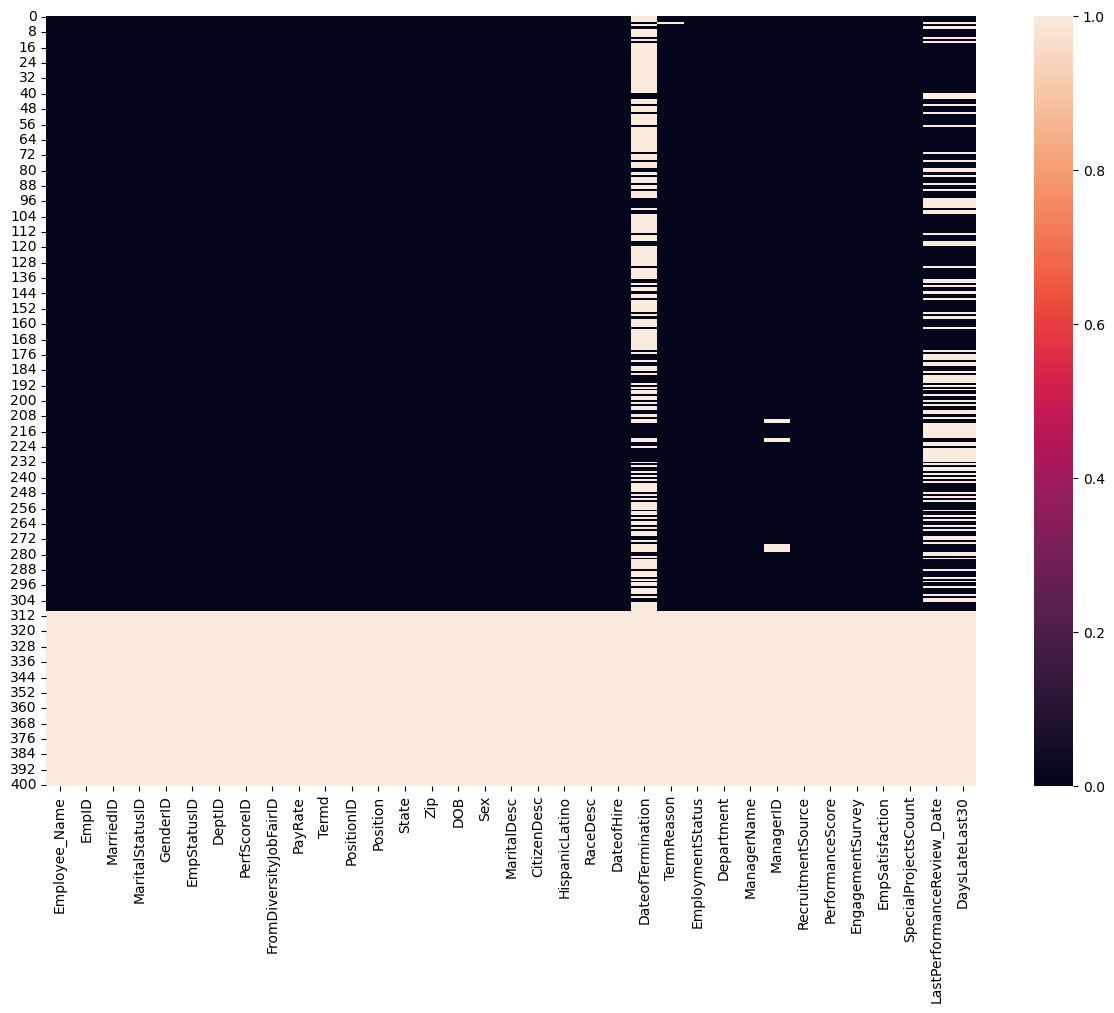

In [3]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())

In [4]:
df.drop(['LastPerformanceReview_Date','DaysLateLast30'],axis=1,inplace=True)

In [5]:
df.dropna(thresh=2,inplace=True)

<Axes: >

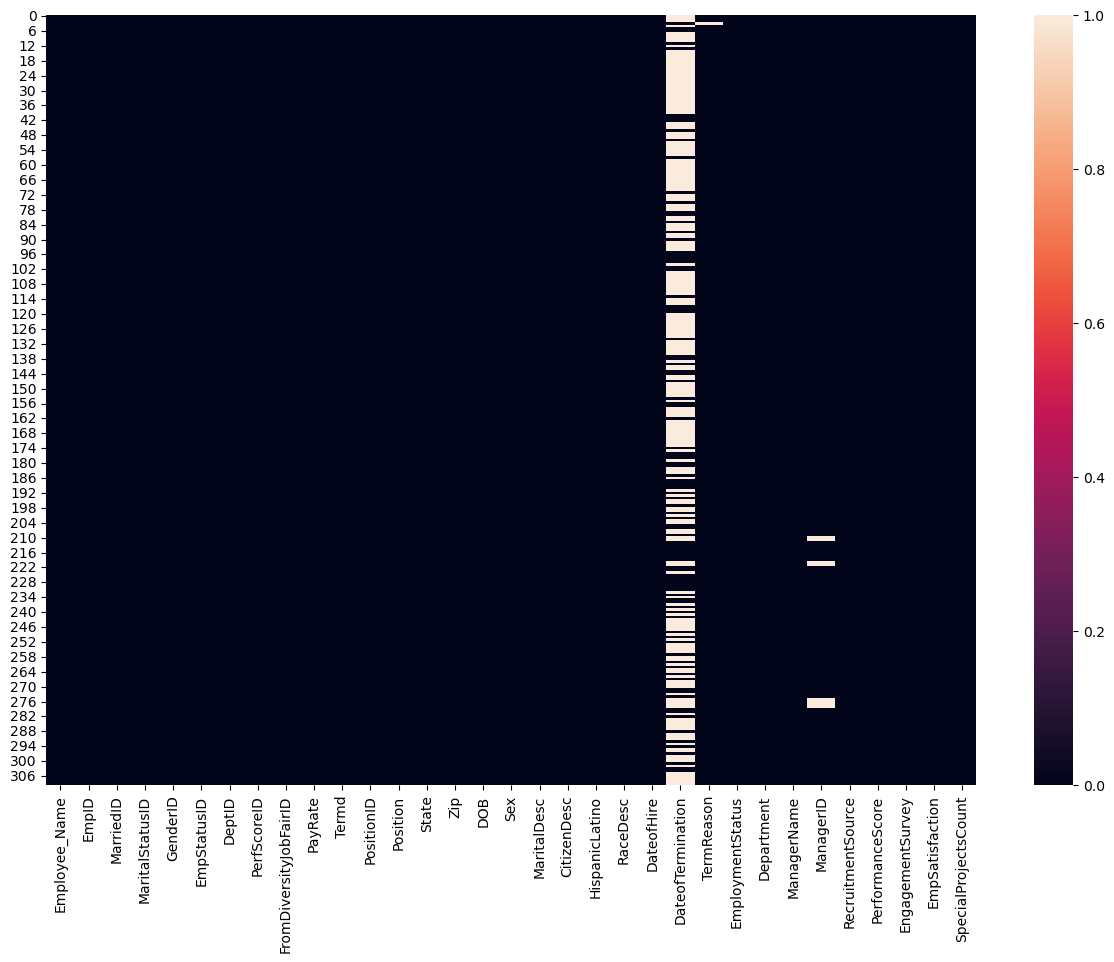

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())

In [7]:
df[['DateofTermination','DOB','DateofHire']].dtypes

DateofTermination    object
DOB                  object
DateofHire           object
dtype: object

In [8]:
df['DOB'] = pd.to_datetime(df['DOB'],format='%m/%d/%y')
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%y')
df['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')

In [9]:
df[['DateofTermination','DOB','DateofHire']].head()

,DateofTermination,DOB,DateofHire
0,NaT,1987-11-24,2008-10-27
1,NaT,1984-04-26,2014-01-06
2,NaT,1986-09-01,2014-09-29
3,2015-04-15,1985-09-16,2015-02-16
4,NaT,1988-05-19,2015-05-01


In [10]:
sns.set_style('darkgrid')

## podpunkt 1

Czy istnieje zależność pomiędzy tym, kto jest bezpośrednim przełożonym (ManagerName, ManagerID) danego pracownika, a oceną wydajności pracy (PerformanceScore)?

In [12]:
dependency1 = df[['ManagerID', 'ManagerName', 'PerformanceScore']].copy()
dependency1

,ManagerID,ManagerName,PerformanceScore
0,1.0,Brandon R. LeBlanc,Fully Meets
1,1.0,Brandon R. LeBlanc,Fully Meets
2,1.0,Brandon R. LeBlanc,Fully Meets
3,1.0,Brandon R. LeBlanc,Fully Meets
4,1.0,Brandon R. LeBlanc,Fully Meets
...,...,...,...
305,7.0,Peter Monroe,Fully Meets
306,7.0,Peter Monroe,Fully Meets
307,7.0,Peter Monroe,Fully Meets
308,7.0,Peter Monroe,Fully Meets


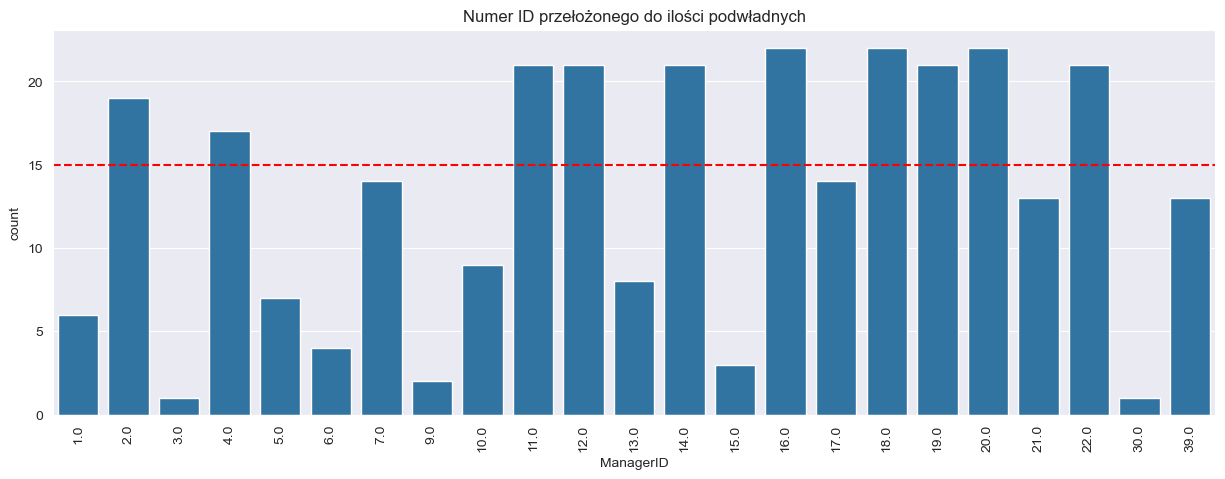

In [50]:
plt.figure(figsize=(15,5))
sns.countplot(x='ManagerID', data=dependency1)
plt.xticks(rotation = 90)
plt.axhline(y=15, color='red', linestyle='--')
plt.title('Numer ID przełożonego do ilości podwładnych')
plt.show()

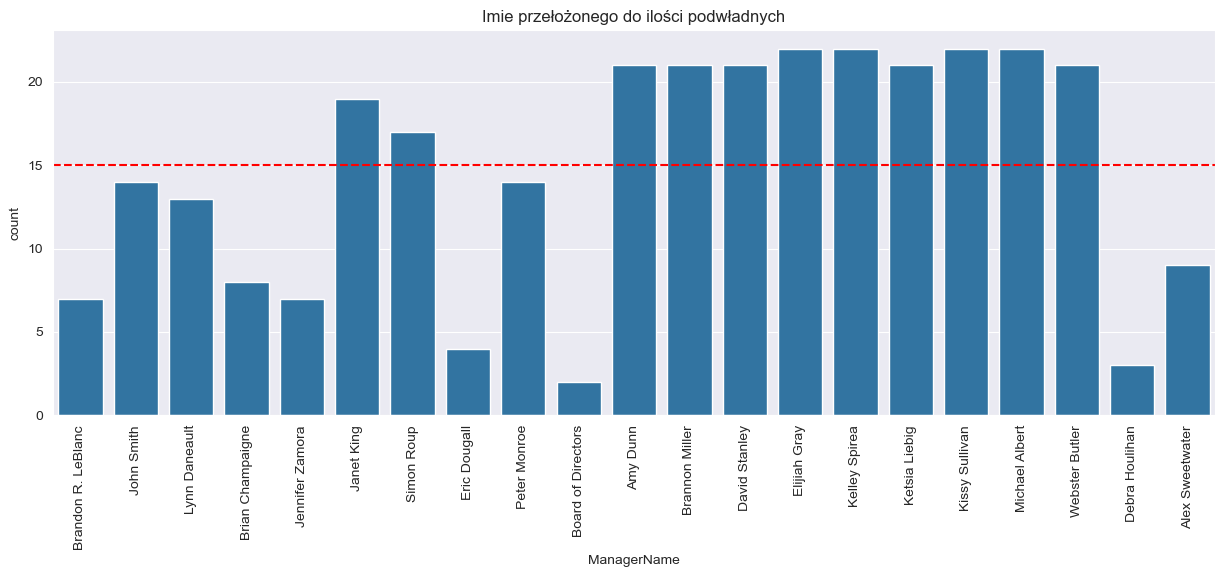

In [60]:
plt.figure(figsize=(15,5))
sns.countplot(x='ManagerName', data=dependency1)
plt.xticks(rotation = 90)
plt.axhline(y=15, color='red', linestyle='--')
plt.title('Imie przełożonego do ilości podwładnych')
plt.show()

In [66]:
def line(*args, **kwargs):
    plt.axhline(y=10, color = 'red', linestyle = '--', linewidth = 1.2)
    plt.axhline(y=18, color = 'red', linestyle = '--', linewidth = 1.2)
    plt.axhline(y=5, color = 'green', linestyle = '--', linewidth = 1.2)
    plt.axhline(y=6, color = 'green', linestyle = '--', linewidth = 1.2)

    plt.axvline(x=11, color = 'red', linestyle = 'dotted')
    plt.axvline(x=22, color = 'red', linestyle = 'dotted')
    plt.axvline(x=2, color = 'green', linestyle = 'dotted')
    plt.axvline(x=4, color = 'green', linestyle = 'dotted')
    plt.axvline(x=23, color = 'blue', linestyle = 'dotted')

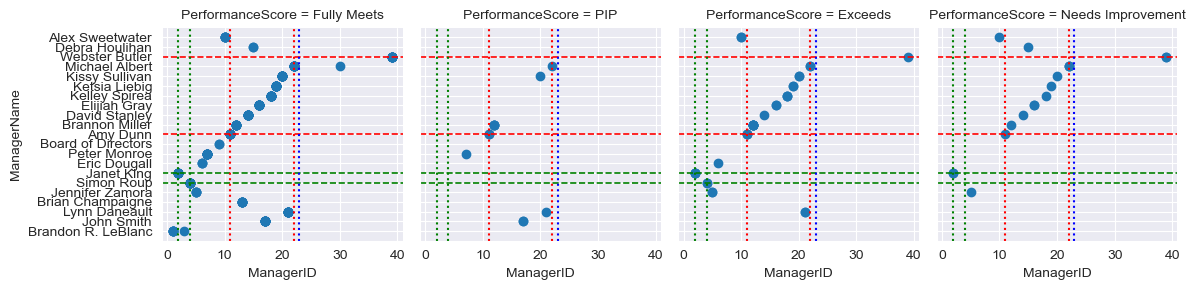

In [68]:
z=sns.FacetGrid(data=dependency1,col='PerformanceScore')
z.map(plt.scatter,'ManagerID', 'ManagerName')
z.map(line)
plt.show()

Odpowiedź: Można wywnioskować z powyższych wykresów, że do 23 id w ManagerID jest duża róźnorodność w PerformanceScore. Po 23 Id różnorodność spada, ponieważ nie występuje wartość PIP. Największa różnorodność występuje w przedziale id 11-23 z ManagerId. Jest to związane z największą liczbą pracowników dla tych Id. Podobną sytuacje mamy dla Id w przedziale 2-4, tylko w tym pypadku nie mamy wartości PIP. Natomiast najlepsze wyniki z PerformanceScore mamy w przedziale id 5-10, ponieważ nie występuje Needs Improvement, a PIP i Exceeds mają po jednym przypadku.
Jeśli chodzi natomiast o powiązanie ManagerName i PerformanceScore to wartości skupiają się głównie przy wynikach Fully Meets,Exceeds oraz Needs Improvement.

## podpunkt 2

Jakie źródła pozyskania pracownika (Recruitment Source) są najlepsze, jeśli zależy nam na jak najdłuższym stażu pracowników?

In [93]:
def count_seniority(row):

    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2019,9,27)
    else:
        end_date = row['DateofTermination']

    return (end_date - row['DateofHire'])/np.timedelta64(365,'D')

In [95]:
df['Seniority'] = df.apply(lambda row: count_seniority(row),axis=1)

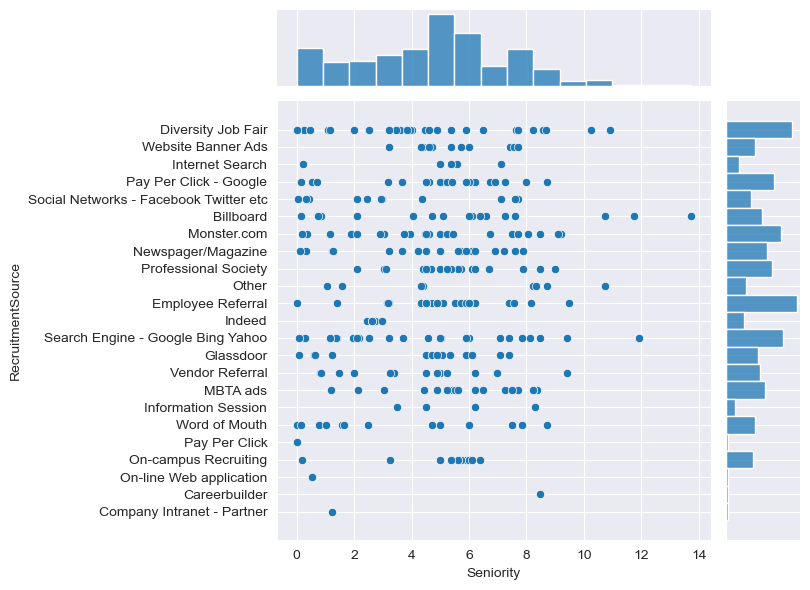

In [99]:
sns.jointplot(x='Seniority',y='RecruitmentSource',data=df)

Odpowiedź: Najdłuższy staż pracy mają prcownicy, którzy znaleźli tą prace poprzez Billbord oraz Divesity Job Fair, ale dobrym źródłem również jest Search Engine.

## podpunkt 3

Czy stan cywilny (MartialDesc) pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy (EmpSatisfaction)?

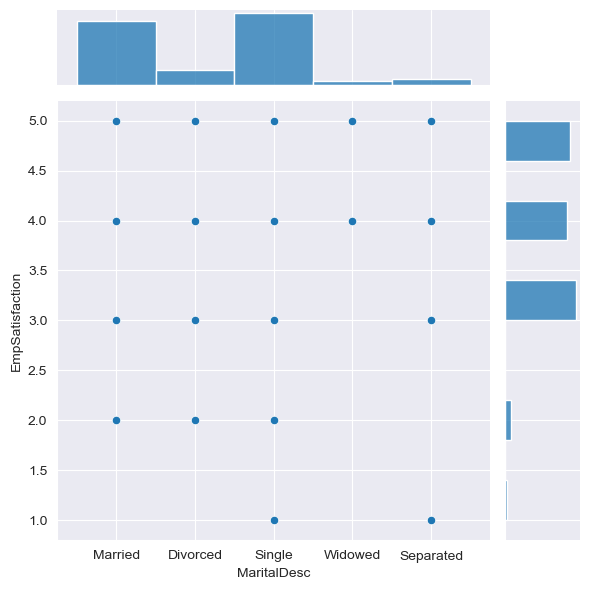

In [116]:
sns.jointplot(x='MaritalDesc',y='EmpSatisfaction',data=df)

Odpowiedź: Tak, największe zadowolenie z pracy widać u pracowników, którzy są w związku małżeńskim oraz singli. Natomiast pozostali pracownicy wykazują o wiele niższe zadowolenie z pracy.

## podpunkt 4

Jak wygląda struktura wieku aktualnie zatrudnionych pracowników?

In [207]:
table = df.copy()

In [209]:
table['Age'] = table.apply(lambda row: -(row['DOB']-dt.datetime(2019,9,27))//np.timedelta64(365,'D'), axis=1)
table1 = table[table['Age']>0]
table1

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,Seniority,Age
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,10.923288,31
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,5.726027,35
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,4.997260,33
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,0.158904,34
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,4.410959,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,"Carr, Claudia N",1.010022e+09,0.0,0.0,0.0,2.0,3.0,3.0,0.0,61.30,...,IT/IS,Simon Roup,4.0,Vendor Referral,Fully Meets,5.00,5.0,6.0,3.243836,33
304,"Roehrich, Bianca",1.111030e+09,0.0,0.0,0.0,5.0,3.0,3.0,0.0,58.50,...,IT/IS,Simon Roup,4.0,Vendor Referral,Fully Meets,3.88,3.0,7.0,0.846575,46
306,"Lajiri, Jyoti",1.108028e+09,1.0,1.0,1.0,3.0,3.0,3.0,0.0,56.20,...,IT/IS,Peter Monroe,7.0,Employee Referral,Fully Meets,4.46,5.0,6.0,4.882192,33
307,"Semizoglou, Jeremiah",9.040136e+08,1.0,1.0,1.0,2.0,3.0,3.0,0.0,53.80,...,IT/IS,Peter Monroe,7.0,On-campus Recruiting,Fully Meets,3.27,4.0,5.0,3.243836,36


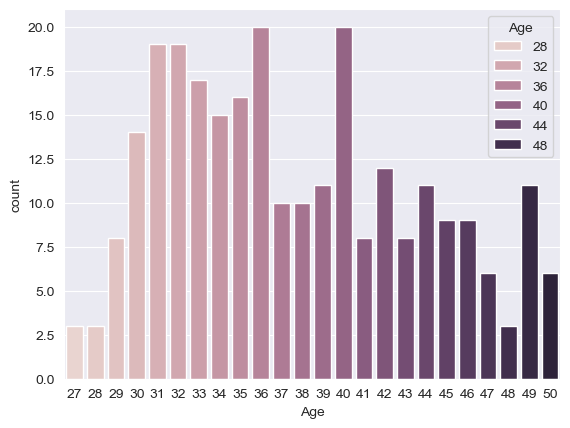

In [211]:
sns.countplot(x='Age',data=table1, hue='Age')
plt.show()

## podpunkt 5

Czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy?

In [223]:
srd_age = table1['Age'].median()
srd_age

36.5

In [225]:
table = table[(table['SpecialProjectsCount']>0) & (table['Age']>0)]

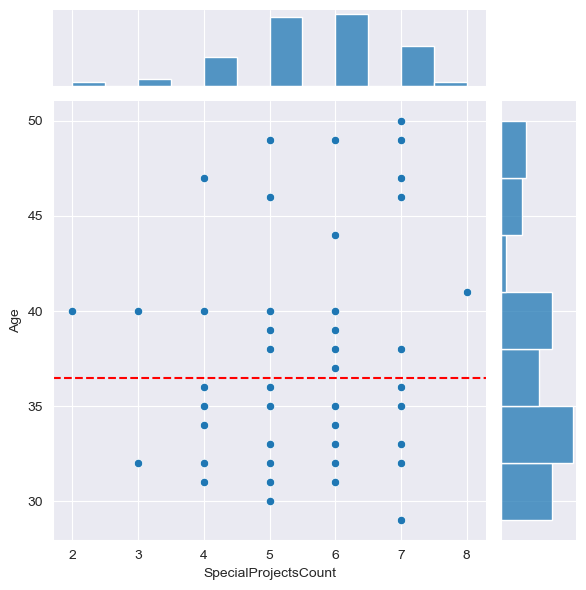

In [227]:
sns.jointplot(x='SpecialProjectsCount',y='Age',data=table)
plt.axhline(y=36.5, color='red', linestyle='--')
plt.show()

Odpowiedź: Ewidentnie widać, że młodsi pracownicy pracują nad większą liczbą specjalnych projektów niż starsi. Średni wiek oddzielający starszych od młodszych pracowników to mediana, która wynosi 36,5 lat.